# <font color = 'red'> Кластеризация </font>

## <font color = 'green'> 1. Постановка задачи кластеризации </font>

Пусть задана обучающая выборка из некоторого множества объектов $X\in X_{all}$ $X = (\overline{x_1}, \overline{x_2},..., \overline{x_n}), \overline{x_i} \in \mathbb{R}^{m}$.

Задача **кластеризации** состоит в поиске обощённой функции или алгоритма $\alpha$ такой что: $\alpha:X_{all} \rightarrow Y$ или $\alpha(\overline x_{i}) = y_{i}$ для $\overline{x_i} \in X$. $Y$ - множество дискретных меток.

Алгоритмы кластеризации относят к классу *методов обучения без учителя* потому, что множество меток не известно заранее и формируется по ходу на основе обучающей выборки.

Множество $X_{cl}$ называют **кластером**, если $\forall \quad \overline{x} \in X_{cl}  \quad  \alpha(\overline{x}) = const = cl $.

## <font color = 'green'> 2. Обзор некоторых методов кластеризации  </font>

### Метод k-средних

Алгоритм **k-средних** - один из самых популярных и используемых методов кластеризации. Идея метода заключается в итеративном нахождении центров кластеров.

Алгоритм требует изначального задания количества кластеров.

Кратко работу алгоритма можно описать так.

1. Задаём количество кластеров $k$.
2. Задаём случайные центры кластеров, которые назовём центроидами $C_{0} = (\overline{\mu_1}, \overline{\mu_2},..., \overline{\mu_k})$.
3. Кластеризуем данные из обучающей выборке, преисывая каждый сэмпл к ближ. кластеру (по некоторой метрике в $\mathbb{R}^{m}$).
4. Далее сдвигаем положения центроидов в геометрический центр получившихся в п.3 кластеров.
5. Проверяем условие выхода. Как правило суммарное расстояние между новыми и старыми центроидами ограничивают некторым малым значением $\epsilon$. В случае если условие выполнено, то возвращаем полученные центроиды кластеров. Если нет, возвращаемся к пункту 3.

Кластер для каждого объекта теперь определяется ближайшим к нему центроидом.

[Подробнее](https://en.wikipedia.org/wiki/K-means_clustering)

### DBSCAN

Алгоритм **DBSCAN** относится к плотностным алгоритмам кластеризации. Он предполагает специальный обход точек из обучающей выборки с последовательным их объединением в кластеры.

Общая идея работы алгоритма описывается следующим образом.

Точкой далее будем называть представителя пространства $\mathbb{R}^{m}$.
Также для работы алгоритма задают два важных гиперпараметра: точность $\epsilon$ и плотность $k$.

1. Точку $p$ будем называть **корневой** если в её $\epsilon$ - откретсности находится не менее $k$ точек.
2. Точка $q$ **прямо достижима** из $p$ если $p$-корневая точка, а расстояние $d(p,q)<\epsilon$. То есть точка $q$ в $\epsilon$ - откретсности $p$. Обозначим $p\rightarrow q$.
3. Точка $q$ **достижима** из $p$, если существует последовательность точек $p = p_{1}\rightarrow p_{2} \rightarrow p_{3}  \rightarrow ... \rightarrow p_{k} \rightarrow q $. Каждая точка $ p_{i}$ - корневая.

Кластер формирует любая корневая точка вместе со всеми точками (корневыми и нет) достижимыми из неё.

Для симметричности часто вводят понятие **плотностоной связности**. Две точки $p$ и $q$ называют *плотностно связанными*, если существует корневая точка $c$ такая что $p$ достижима из $c$ и $q$ достижима из $c$. Очивидно, что в данных терминах кластер - множество попарно *плотностно связаннымых* точек.

Реализация предполагает последовательный обход точек с формированием кластеров, согласно определениям выше. Точки, не попавшие не в один кластер (подумайте, откуда такие возьмутся?) кластризуются как шум. Алгоритм **DBSCAN** отлично показывает себя на обучающих данных различной формы.

[Подробнее](https://habr.com/ru/articles/322034/)

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_classification, make_blobs, make_moons, make_circles, make_swiss_roll
from matplotlib import pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

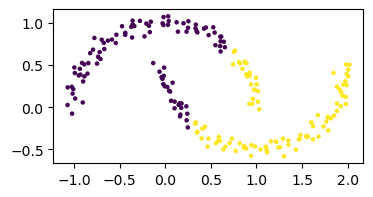

In [ ]:
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=5, cmap='viridis');

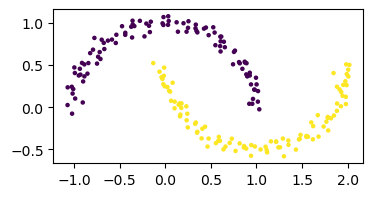

In [ ]:
model = DBSCAN(eps=0.2,min_samples=5)
model.fit(X)
plt.figure(figsize=(4, 2))
plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
            s=5, cmap='viridis');

### Иерархическая агломеративная кластеризация.

Идея агломеративной кластеризации следующая.

1. Кластер формируется в каждой точке данных.
2. Далее кластеры попарно объединяются по принципу близости (к примеру минимальное расстояние между точками кластера).
3. Процесс продолжается пока данные не объединятся в один кластер.

Остановив процесс слияния на нужном этапе получим  кластеризацию на необходимое количество кластеров.

[Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F)

## <font color = 'green'> 3. Задания </font>

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте самостоятельно, описанные алгоритмы кластеризации.
2. Сравните результаты работы со встроенными методами. Графически интерпретируйте результаты.
3. Дайте аргументированные ответы о скорости и эффективности работы на различных искусственных данных для реализованных и встроенных алгоритмов.
4. Оцените качество кластеризации используя различные методы (ARI, силуэт и др). [Подробнее](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)
5. Изучте ещё 3 любых метода кластеризации и приведите сравнительную характеристику работы 6 алгоритмов кластеризации по проивзодительности на различных данных.*
6. Реализовать анимацию работы алгоритма DBSCAN*

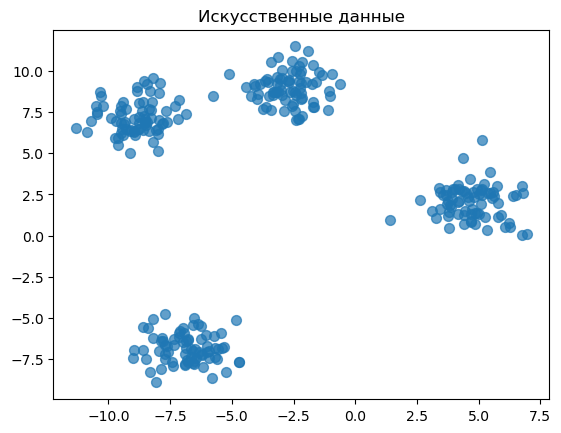

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.spatial.distance import cdist
import time

data, labels = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

def plot_data(data, labels=None, title="Data"):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.show()

plot_data(data, title="Искусственные данные")


In [ ]:
class CustomKMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            self.labels = np.argmin(cdist(X, self.centroids), axis=1)
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids

    def predict(self, X):
        return np.argmin(cdist(X, self.centroids), axis=1)

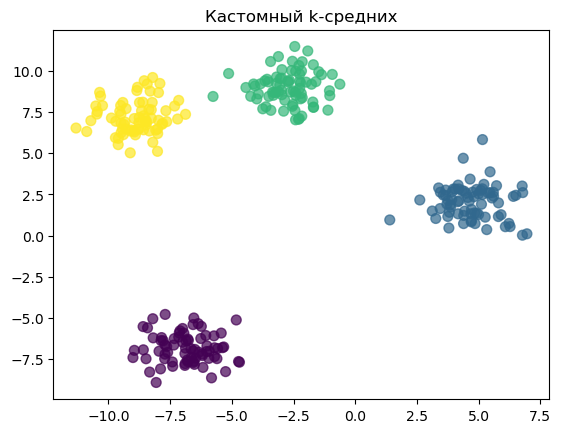

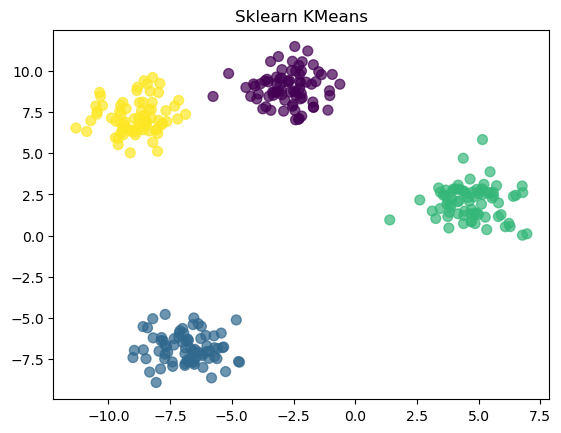

In [ ]:
custom_kmeans = CustomKMeans(n_clusters=4)
custom_kmeans.fit(data)
kmeans_labels = custom_kmeans.predict(data)
plot_data(data, kmeans_labels, title="Кастомный k-средних")

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels_sklearn = kmeans.fit_predict(data)
plot_data(data, kmeans_labels_sklearn, title="Sklearn KMeans")

In [ ]:
class CustomDBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        n_samples = X.shape[0]
        self.labels = -np.ones(n_samples)
        cluster_id = 0

        for i in range(n_samples):
            if self.labels[i] != -1:
                continue

            neighbors = self._region_query(X, i)
            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  # Шум
            else:
                self._expand_cluster(X, i, neighbors, cluster_id)
                cluster_id += 1

    def _region_query(self, X, idx):
        distances = np.linalg.norm(X - X[idx], axis=1)
        return np.where(distances < self.eps)[0]

    def _expand_cluster(self, X, idx, neighbors, cluster_id):
        self.labels[idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if self.labels[neighbor] == -1:
                self.labels[neighbor] = cluster_id
            elif self.labels[neighbor] == -1:
                self.labels[neighbor] = cluster_id
                new_neighbors = self._region_query(X, neighbor)
                if len(new_neighbors) >= self.min_samples:
                    neighbors = np.concatenate((neighbors, new_neighbors))
            i += 1

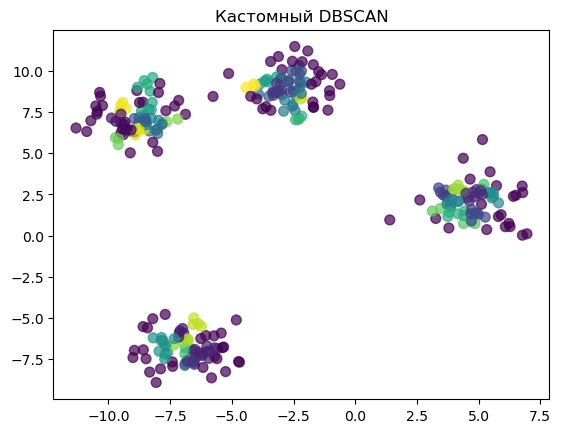

In [ ]:
custom_dbscan = CustomDBSCAN(eps=0.5, min_samples=5)
custom_dbscan.fit(data)
plot_data(data, custom_dbscan.labels, title="Кастомный DBSCAN")

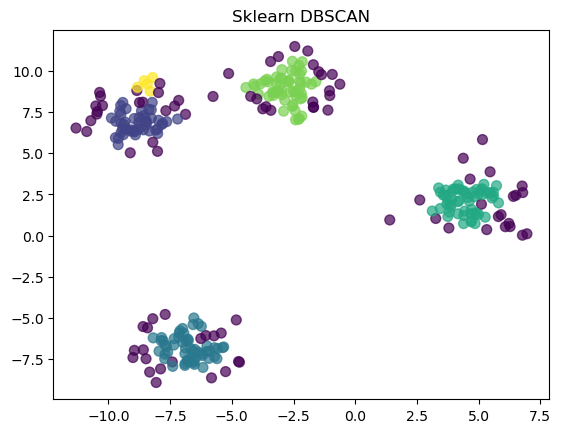

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)
plot_data(data, dbscan_labels, title="Sklearn DBSCAN")

In [ ]:
class CustomAgglomerative:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X):
        from scipy.cluster.hierarchy import linkage, fcluster
        self.linkage_matrix = linkage(X, method='ward')
        self.labels = fcluster(self.linkage_matrix, self.n_clusters, criterion='maxclust') - 1

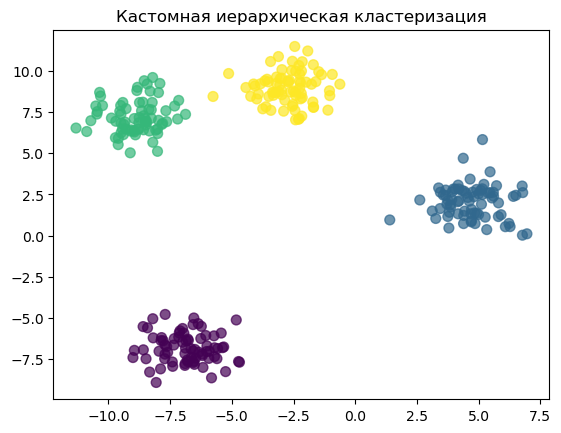

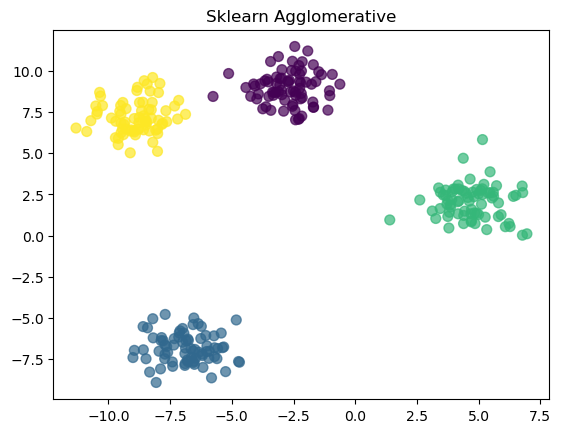

In [ ]:
custom_agglomerative = CustomAgglomerative(n_clusters=4)
custom_agglomerative.fit(data)
plot_data(data, custom_agglomerative.labels, title="Кастомная иерархическая кластеризация")

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(data)
plot_data(data, agg_labels, title="Sklearn Agglomerative")

In [ ]:
print("Оценка качества кастомных алгоритмов:")
print("Adjusted Rand Index (Custom KMeans):", adjusted_rand_score(labels, kmeans_labels))
print("Silhouette Score (Custom KMeans):", silhouette_score(data, kmeans_labels))

print("Adjusted Rand Index (Custom DBSCAN):", adjusted_rand_score(labels, custom_dbscan.labels))
print("Silhouette Score (Custom DBSCAN):", silhouette_score(data, custom_dbscan.labels))

print("Adjusted Rand Index (Custom Agglomerative):", adjusted_rand_score(labels, custom_agglomerative.labels))
print("Silhouette Score (Custom Agglomerative):", silhouette_score(data, custom_agglomerative.labels))



Оценка качества кастомных алгоритмов:
Adjusted Rand Index (Custom KMeans): 0.9910811504997546
Silhouette Score (Custom KMeans): 0.7915830011443039
Adjusted Rand Index (Custom DBSCAN): 0.056033785745861736
Silhouette Score (Custom DBSCAN): -0.05690979023495719
Adjusted Rand Index (Custom Agglomerative): 0.9910811504997546
Silhouette Score (Custom Agglomerative): 0.7915830011443039
